# Import Require Libarary

In [1]:
import numpy as np #for arrays
import pandas as pd #data manipulation
import seaborn as sns #visualization
import matplotlib.pyplot as plt # better visualization
%matplotlib inline 
from scipy.stats import ttest_ind #for hypothesis testing
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Load Dataset

In [2]:
#load dataset
tran_data = pd.read_excel('C:\\Users\\Sakawat Siyam\\Downloads\\QVI_transaction_data.xlsx')

In [3]:
#show first five rows
tran_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
#summary statistics
tran_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [5]:
#summary statistics on object
tran_data.describe(include='object')

,PROD_NAME
count,264836
unique,114
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304


In [6]:
#load purchase behaivior dataset
pur_bvr = pd.read_csv('C:\\Users\\Sakawat Siyam\\Downloads\\QVI_purchase_behaviour.csv')

In [7]:
# check the purchase behaivior dataset
pur_bvr.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [8]:
#summary statistics
pur_bvr.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [9]:
#summary statistics on object
pur_bvr.describe(include='object')

,LIFESTAGE,PREMIUM_CUSTOMER
count,72637,72637
unique,7,3
top,RETIREES,Mainstream
freq,14805,29245


In [10]:
#check null value in these dataset
tran_data.isnull().sum().sum()
pur_bvr.isnull().sum().sum()

0

In [11]:
#merge two dataframe on LYLTY_CARD_NBR
merged_data = pur_bvr.merge(tran_data, on ='LYLTY_CARD_NBR', how='right')
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,43599,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,43605,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,43329,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,43330,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [12]:
#check the lenght
print('The lenght of merged data is ',len(merged_data))
print('The lenght of transaction data is ',len(tran_data))

The lenght of merged data is  264836
The lenght of transaction data is  264836


In [13]:
#check the types of merged data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


Here the date format is integer. We convert into date

In [14]:
# The 'New_Date_Column' will now contain the converted dates
merged_data['New_Date_Column']=pd.to_datetime(merged_data['DATE'],unit='D',origin='1899-12-30')

Check all chips name to make sure

In [15]:
#how many unique product existing
merged_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [16]:
# Remove numeric values followed by 'g' or 'G' and non-word characters
split_prods = merged_data["PROD_NAME"].str.replace(r'([0-9]+[gG])', '').str.replace(r'[^\w\s]', '')
# Store the result in a new column
merged_data['Cleaned_PROD_NAME'] = split_prods

C:\Users\Sakawat Siyam\AppData\Local\Temp\ipykernel_18544\1309154718.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  split_prods = merged_data["PROD_NAME"].str.replace(r'([0-9]+[gG])', '').str.replace(r'[^\w\s]', '')


In [17]:
#check marged data on Cleaned product name
merged_data['Cleaned_PROD_NAME']

0          Natural Chip        Compny SeaSalt
1                        CCs Nacho Cheese    
2          Smiths Crinkle Cut  Chips Chicken 
3            Smiths Chip Thinly  SCreamOnion 
4         Kettle Tortilla ChpsHnyJlpno Chili 
                         ...                 
264831    Kettle Sweet Chilli And Sour Cream 
264832              Tostitos Splash Of  Lime 
264833                   Doritos Mexicana    
264834    Doritos Corn Chip Mexican Jalapeno 
264835              Tostitos Splash Of  Lime 
Name: Cleaned_PROD_NAME, Length: 264836, dtype: object

In [18]:
#count the frequency word in split_prods column
word_counts ={}
def count_words(line):
    words=line.split()
    for word in words:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word]+=1
split_prods.apply(lambda line: count_words(line))

#convert the word count dictionary into pandas series
word_counts_series = pd.Series(word_counts)
word_counts_sorted = word_counts_series.sort_values(ascending=False)
print(word_counts_sorted)


Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
            ...  
Sunbites     1432
Pc           1431
NCC          1419
Garden       1419
Fries        1418
Length: 193, dtype: int64


In [19]:
#check the merged data statistics and type
print(merged_data.describe(),'\n')
print(merged_data.info())

       LYLTY_CARD_NBR           DATE     STORE_NBR        TXN_ID  \
count    2.648360e+05  264836.000000  264836.00000  2.648360e+05   
mean     1.355495e+05   43464.036260     135.08011  1.351583e+05   
std      8.057998e+04     105.389282      76.78418  7.813303e+04   
min      1.000000e+03   43282.000000       1.00000  1.000000e+00   
25%      7.002100e+04   43373.000000      70.00000  6.760150e+04   
50%      1.303575e+05   43464.000000     130.00000  1.351375e+05   
75%      2.030942e+05   43555.000000     203.00000  2.027012e+05   
max      2.373711e+06   43646.000000     272.00000  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.00

In [20]:
#the merged data divided in 4 counts 
bin_counts = merged_data['PROD_QTY'].value_counts(bins=4).sort_index()
print(bin_counts)

(0.8, 50.75]       264834
(50.75, 100.5]          0
(100.5, 150.25]         0
(150.25, 200.0]         2
Name: PROD_QTY, dtype: int64


We find out two product quantity are outlier

In [21]:
# data showing decending order by prod_qty
merged_data.sort_values(by='PROD_QTY',ascending=False).head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,New_Date_Column,Cleaned_PROD_NAME
69762,226000,OLDER FAMILIES,Premium,43331,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018-08-19,Dorito Corn Chp Supreme
69763,226000,OLDER FAMILIES,Premium,43605,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019-05-20,Dorito Corn Chp Supreme
217237,201060,YOUNG FAMILIES,Premium,43603,201,200202,26,Pringles Sweet&Spcy BBQ 134g,5,18.5,2019-05-18,Pringles SweetSpcy BBQ
238333,219004,YOUNG SINGLES/COUPLES,Mainstream,43326,219,218018,25,Pringles SourCream Onion 134g,5,18.5,2018-08-14,Pringles SourCream Onion
238471,261331,YOUNG SINGLES/COUPLES,Mainstream,43604,261,261111,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0,2019-05-19,Infuzions BBQ Rib Prawn Crackers


In [22]:
#here the column are show in less than 6
merged_data = merged_data[merged_data['PROD_QTY']<6]

In [23]:
#check the length of merged data
len(merged_data[merged_data['LYLTY_CARD_NBR']==226000])

0

In [24]:
# statistics of merged data on particular column
merged_data['New_Date_Column'].describe()

C:\Users\Sakawat Siyam\AppData\Local\Temp\ipykernel_18544\2913253103.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_data['New_Date_Column'].describe()


count                  264834
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: New_Date_Column, dtype: object

In [25]:
#showing the date range
pd.date_range(start=merged_data["DATE"].min(), end=merged_data['New_Date_Column'].max()).difference(merged_data['New_Date_Column'])

DatetimeIndex(['1970-01-01 00:00:00.000043282',
               '1970-01-02 00:00:00.000043282',
               '1970-01-03 00:00:00.000043282',
               '1970-01-04 00:00:00.000043282',
               '1970-01-05 00:00:00.000043282',
               '1970-01-06 00:00:00.000043282',
               '1970-01-07 00:00:00.000043282',
               '1970-01-08 00:00:00.000043282',
               '1970-01-09 00:00:00.000043282',
               '1970-01-10 00:00:00.000043282',
               ...
               '2019-06-20 00:00:00.000043282',
               '2019-06-21 00:00:00.000043282',
               '2019-06-22 00:00:00.000043282',
               '2019-06-23 00:00:00.000043282',
               '2019-06-24 00:00:00.000043282',
               '2019-06-25 00:00:00.000043282',
               '2019-06-26 00:00:00.000043282',
               '2019-06-27 00:00:00.000043282',
               '2019-06-28 00:00:00.000043282',
               '2019-06-29 00:00:00.000043282'],
              dtype=

In [26]:
check_null_date = pd.merge(pd.Series(pd.date_range(start=merged_data['New_Date_Column'].min(), end = merged_data['New_Date_Column'].max()), name='New_Date_Column'), merged_data, on = 'New_Date_Column', how = "left")


C:\Users\Sakawat Siyam\AppData\Local\Temp\ipykernel_18544\566291621.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()


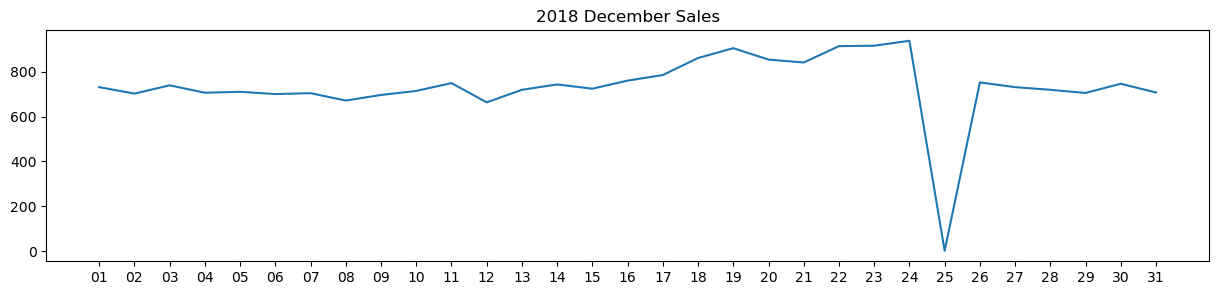

In [27]:
trans_by_date = check_null_date['New_Date_Column'].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("2018 December Sales")
plt.savefig("2018 December Sales.png", bbox_inches="tight")
plt.show()
     

In [28]:
check_null_date['New_Date_Column'].value_counts().sort_values().head()

2018-12-25      1
2018-11-25    648
2018-10-18    658
2019-06-13    659
2019-06-24    662
Name: New_Date_Column, dtype: int64

The day with no transaction is a Christmas day that is when the store is closed. So there is no anomaly in this.

In [29]:
# Replace numeric values followed by 'g' with 'g'
merged_data["PROD_NAME"] = merged_data["PROD_NAME"].str.replace(r'[0-9]+(G)', 'g')

# Extract pack sizes and convert to float
pack_sizes = merged_data["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g", "").astype("float")

# Display summary statistics
print(pack_sizes.describe())


C:\Users\Sakawat Siyam\AppData\Local\Temp\ipykernel_18544\3958680111.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_data["PROD_NAME"] = merged_data["PROD_NAME"].str.replace(r'[0-9]+(G)', 'g')


count    258770.000000
mean        182.324276
std          64.955035
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64


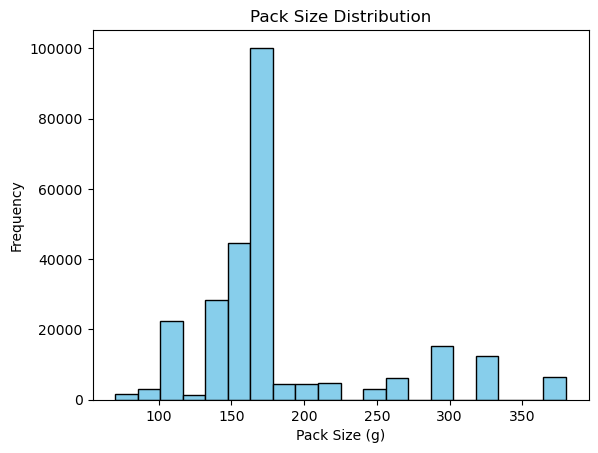

In [30]:
# Create a histogram with different colors
pack_sizes.plot.hist(bins=20, color='skyblue', edgecolor='black')

# Customize the plot
plt.title("Pack Size Distribution")
plt.xlabel("Pack Size (g)")
plt.ylabel("Frequency")

# Show the plot
plt.show()


In [31]:
#check the product name and quantity
merged_data['PROD_NAME'].str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28860
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
Name: PROD_NAME, dtype: int64

In [32]:
merged_data["PROD_NAME"].str.split()[merged_data["PROD_NAME"].str.split().str[0] == "Red"].value_counts()

[Red, Rock, Deli, Sp, Salt, &, Truffle, g]        1498
[Red, Rock, Deli, Thai, Chilli&Lime, 150g]        1495
[Red, Rock, Deli, SR, Salsa, &, Mzzrlla, 150g]    1458
[Red, Rock, Deli, Chikn&Garlic, Aioli, 150g]      1434
Name: PROD_NAME, dtype: int64

In [33]:
merged_data["Cleaned_Brand_Names"] = merged_data["PROD_NAME"].str.split().str[0]

In [34]:
def clean_brand_names(line):
    brand = line["Cleaned_Brand_Names"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand

In [35]:
merged_data["Cleaned_Brand_Names"] = merged_data.apply(clean_brand_names, axis=1)


<Axes: >

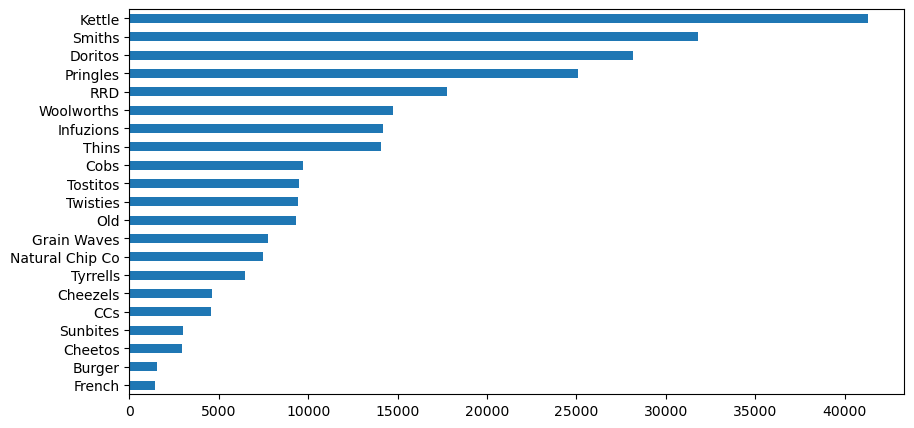

In [36]:
merged_data["Cleaned_Brand_Names"].value_counts(ascending=True).plot.barh(figsize=(10,5))

In [37]:
merged_data.isnull().sum()

LYLTY_CARD_NBR         0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
DATE                   0
STORE_NBR              0
TXN_ID                 0
PROD_NBR               0
PROD_NAME              0
PROD_QTY               0
TOT_SALES              0
New_Date_Column        0
Cleaned_PROD_NAME      0
Cleaned_Brand_Names    0
dtype: int64

1.Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is?


2.How many customers are in each segment?


3.How many chips are bought per customer by segment?

4.What's the average chip price by customer segment?

In [38]:
grouped_sales = pd.DataFrame(merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))
grouped_sales.sort_values(ascending=False, by="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            168363.25  7.269570
YOUNG SINGLES/COUPLES  Mainstream        157621.60  7.558339
RETIREES               Mainstream        155677.05  7.252262
YOUNG FAMILIES         Budget            139345.85  7.287201
OLDER SINGLES/COUPLES  Budget            136769.80  7.430315
                       Mainstream        133393.80  7.282116
                       Premium           132263.15  7.449766
RETIREES               Budget            113147.80  7.443445
OLDER FAMILIES         Mainstream        103445.55  7.262395
RETIREES               Premium            97646.05  7.456174
YOUNG FAMILIES         Mainstream         92788.75  7.189025
MIDAGE SINGLES/COUPLES Mainstream         90803.85  7.647284
YOUNG FAMILIES         Premium            84025.50  7.266756
OLDER FAMILIES         Premium            80658.40  7.208079
YOUNG SINGLES/COUPLES  Budget             61141.60  6.615624
MIDAGE SINGLES/COUPLES Premium            58432.65  7.112056
YOUNG SINGLES/COUPLES  Premium            41642.10  6.629852
MIDAGE SINGLES/COUPLES Budget             35514.80  7.074661
NEW FAMILIES           Budget             21928.45  7.297321
                       Mainstream         17013.90  7.317806
                       Premium            11491.10  7.231655

In [39]:
print('Toatal Group sales: ',grouped_sales['sum'].sum())

Toatal Group sales:  1933115.0000000002


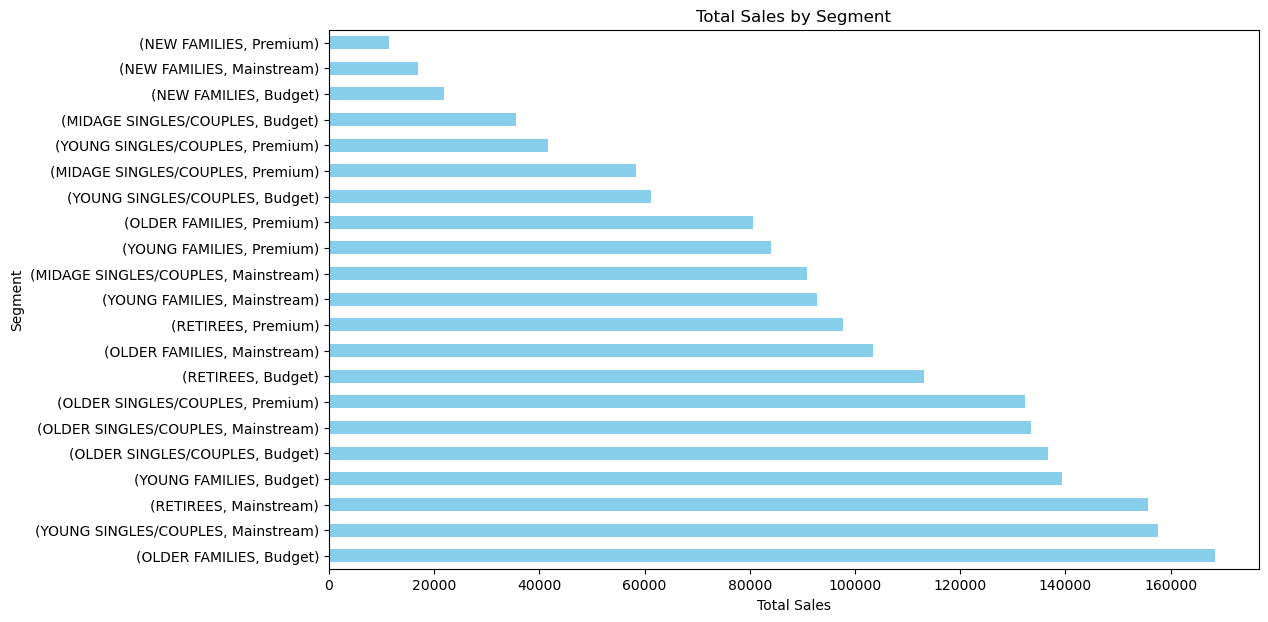

In [40]:
# Assuming you have already created the "grouped_sales" DataFrame
sorted_grouped_sales = grouped_sales["sum"].sort_values(ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(12, 7))
sorted_grouped_sales.plot(kind='barh', color='skyblue')

# Customize the plot
plt.title("Total Sales by Segment")
plt.xlabel("Total Sales")
plt.ylabel("Segment")

# Show the plot
plt.show()

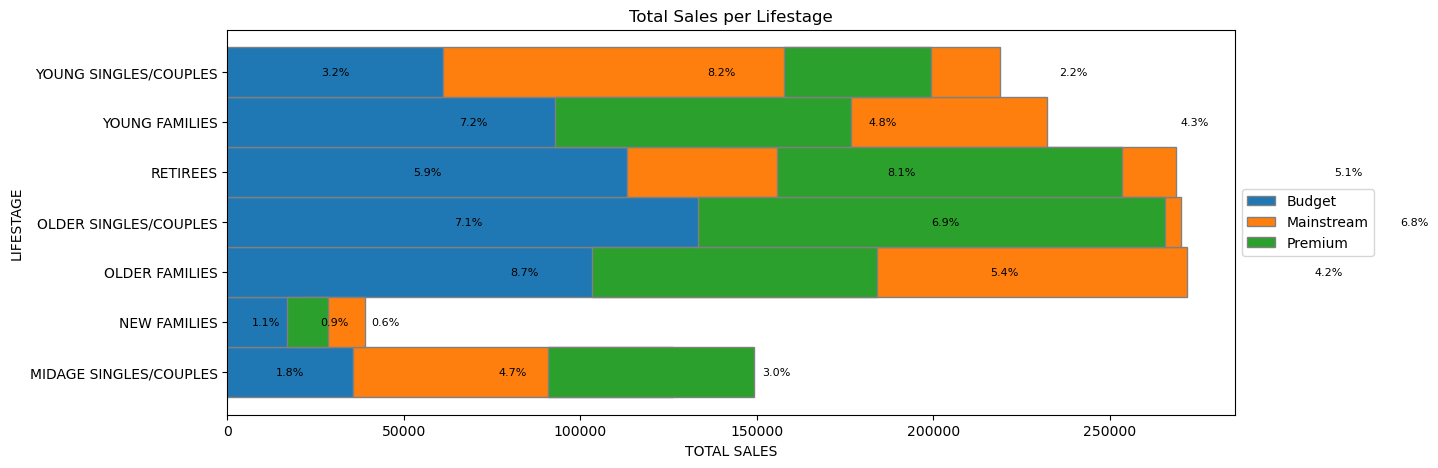

In [41]:
# Values of each group
bars1 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["sum"]
bars2 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["sum"]
bars3 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["sum"]
 
bars1_text = (bars1 / sum(grouped_sales["sum"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(grouped_sales["sum"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(grouped_sales["sum"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = grouped_sales.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(13,5)) 

# Create brown bars
budget_bar = plt.barh(r, bars1, edgecolor='grey', height=1, label="Budget")
# Create green bars (middle), on top of the firs ones
mains_bar = plt.barh(r, bars2, left=bars1, edgecolor='grey', height=1, label="Mainstream")
# Create green bars (top)
tmp_bar = np.add(bars1, bars2)
prem_bar = plt.barh(r, bars3, left=bars2, edgecolor='grey', height=1, label="Premium")

for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=8)
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=8)
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("TOTAL SALES")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Total Sales per Lifestage")

plt.savefig("lifestage_sales.png", bbox_inches="tight")

# Show graphic
plt.show()

In [42]:
stage_agg_prem = merged_data.groupby("LIFESTAGE")["PREMIUM_CUSTOMER"].agg(pd.Series.mode).sort_values()
print("Top contributor per LIFESTAGE by PREMIUM category")
print(stage_agg_prem)

Top contributor per LIFESTAGE by PREMIUM category
LIFESTAGE
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
OLDER SINGLES/COUPLES         Budget
YOUNG FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
RETIREES                  Mainstream
YOUNG SINGLES/COUPLES     Mainstream
Name: PREMIUM_CUSTOMER, dtype: object


1. Older families (Budget) $156,864

2. Young Singles/Couples (Mainstream) $147,582

3. Retirees (Mainstream) $145,169

In [43]:
unique_cust = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False)
pd.DataFrame(unique_cust)

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  8088
RETIREES               Mainstream                  6479
OLDER SINGLES/COUPLES  Mainstream                  4930
                       Budget                      4929
                       Premium                     4750
OLDER FAMILIES         Budget                      4675
RETIREES               Budget                      4454
YOUNG FAMILIES         Budget                      4017
RETIREES               Premium                     3872
YOUNG SINGLES/COUPLES  Budget                      3779
MIDAGE SINGLES/COUPLES Mainstream                  3340
OLDER FAMILIES         Mainstream                  2831
YOUNG FAMILIES         Mainstream                  2728
YOUNG SINGLES/COUPLES  Premium                     2574
YOUNG FAMILIES         Premium                     2433
MIDAGE SINGLES/COUPLES Premium                     2431
OLDER FAMILIES         Premium                     2273
MIDAGE SINGLES/COUPLES Budget                      1504
NEW FAMILIES           Budget                      1112
                       Mainstream                   849
                       Premium                      588

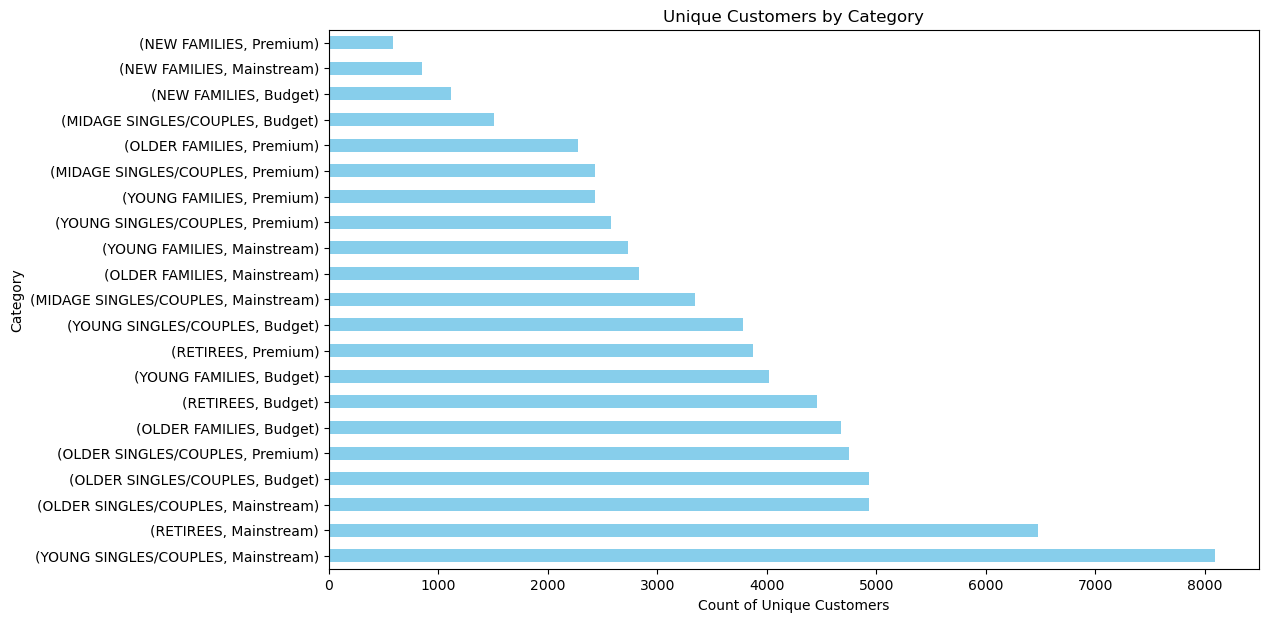

In [44]:
# Sort the data in descending order
unique_cust_sorted = unique_cust.sort_values(ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(12, 7))
unique_cust_sorted.plot(kind='barh', color='skyblue')

# Customize the plot
plt.title("Unique Customers by Category")
plt.xlabel("Count of Unique Customers")
plt.ylabel("Category")

# Show the plot
plt.show()

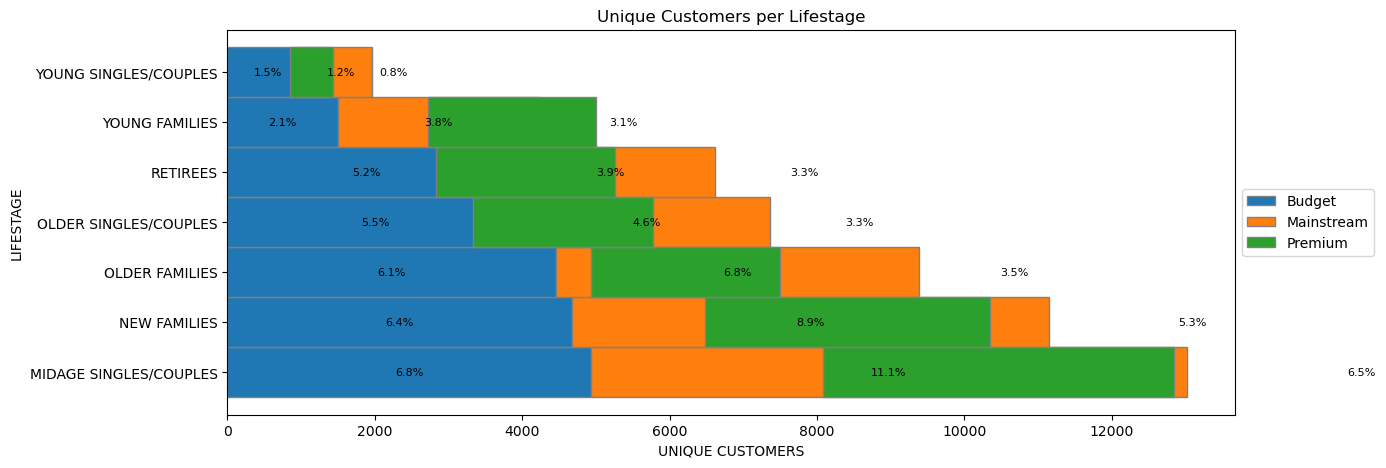

In [45]:
# Values of each group
ncust_bars1 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]
ncust_bars2 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]
ncust_bars3 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]
 
ncust_bars1_text = (ncust_bars1 / sum(unique_cust)).apply("{:.1%}".format)
ncust_bars2_text = (ncust_bars2 / sum(unique_cust)).apply("{:.1%}".format)
ncust_bars3_text = (ncust_bars3 / sum(unique_cust)).apply("{:.1%}".format)
 
# # Names of group and bar width
#names = unique_cust.index.get_level_values("LIFESTAGE").unique()

# # The position of the bars on the x-axis
#r = np.arange(len(names))

plt.figure(figsize=(13,5)) 

# # Create brown bars
budget_bar = plt.barh(r, ncust_bars1, edgecolor='grey', height=1, label="Budget")
# # Create green bars (middle), on top of the firs ones
mains_bar = plt.barh(r, ncust_bars2, left=ncust_bars1, edgecolor='grey', height=1, label="Mainstream")
# # Create green bars (top)
prem_bar = plt.barh(r, ncust_bars3, left=ncust_bars2, edgecolor='grey', height=1, label="Premium")

for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, ncust_bars1_text[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_bar[i].get_width()/2, i, ncust_bars2_text[i], va='center', ha='center', size=8)
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, ncust_bars3_text[i], va='center', ha='center', size=8)
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("UNIQUE CUSTOMERS")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Unique Customers per Lifestage")

plt.savefig("lifestage_customers.png", bbox_inches="tight")

# # Show graphic
plt.show()

The high sales amount by segment "Young Singles/Couples - Mainstream" and "Retirees - Mainstream" are due to their large number of unique customers, but not for the "Older - Budget" segment. Next we'll explore if the "Older - Budget" segment has:    High Frequency of Purchase and, Average Sales per Customer compared to the other segment.

In [46]:
freq_per_cust = merged_data.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]).count()["DATE"]
freq_per_cust.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(["mean", "count"]).sort_values(ascending=False, by="mean")

mean  count
LIFESTAGE              PREMIUM_CUSTOMER                 
OLDER FAMILIES         Mainstream        5.031438   2831
                       Budget            4.954011   4675
                       Premium           4.923009   2273
YOUNG FAMILIES         Budget            4.760269   4017
                       Premium           4.752569   2433
                       Mainstream        4.731305   2728
OLDER SINGLES/COUPLES  Premium           3.737684   4750
                       Budget            3.734429   4929
                       Mainstream        3.715619   4930
MIDAGE SINGLES/COUPLES Mainstream        3.555090   3340
RETIREES               Budget            3.412887   4454
                       Premium           3.382231   3872
MIDAGE SINGLES/COUPLES Premium           3.379679   2431
                       Budget            3.337766   1504
RETIREES               Mainstream        3.313166   6479
NEW FAMILIES           Mainstream        2.738516    849
                       Premium           2.702381    588
                       Budget            2.702338   1112
YOUNG SINGLES/COUPLES  Mainstream        2.578388   8088
                       Budget            2.445621   3779
                       Premium           2.440171   2574

The above table describes the "Average frequency of Purchase per segment" and "Unique customer per segment". The top three most frequent purchase is contributed by the "Older Families" lifestage segment. We can see now that the "Older - Budget" segment contributes to high sales partly because of the combination of: High Frequency of Purchase and, Fairly high unique number of customer in the segment

In [47]:
grouped_sales.sort_values(ascending=False,by='mean')

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
MIDAGE SINGLES/COUPLES Mainstream         90803.85  7.647284
YOUNG SINGLES/COUPLES  Mainstream        157621.60  7.558339
RETIREES               Premium            97646.05  7.456174
OLDER SINGLES/COUPLES  Premium           132263.15  7.449766
RETIREES               Budget            113147.80  7.443445
OLDER SINGLES/COUPLES  Budget            136769.80  7.430315
NEW FAMILIES           Mainstream         17013.90  7.317806
                       Budget             21928.45  7.297321
YOUNG FAMILIES         Budget            139345.85  7.287201
OLDER SINGLES/COUPLES  Mainstream        133393.80  7.282116
OLDER FAMILIES         Budget            168363.25  7.269570
YOUNG FAMILIES         Premium            84025.50  7.266756
OLDER FAMILIES         Mainstream        103445.55  7.262395
RETIREES               Mainstream        155677.05  7.252262
NEW FAMILIES           Premium            11491.10  7.231655
OLDER FAMILIES         Premium            80658.40  7.208079
YOUNG FAMILIES         Mainstream         92788.75  7.189025
MIDAGE SINGLES/COUPLES Premium            58432.65  7.112056
                       Budget             35514.80  7.074661
YOUNG SINGLES/COUPLES  Premium            41642.10  6.629852
                       Budget             61141.60  6.615624

Highest average spending per purchase are contributed by the Midage and Young "Singles/Couples". The difference between their Mainstream and Non-Mainstream group might seem insignificant (7.6 vs 6.6), but we'll find out by examining if the difference is statistically significant.

In [48]:
mainstream = merged_data["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (merged_data["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (merged_data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")

budget_premium = (merged_data["PREMIUM_CUSTOMER"] == "Budget") | (merged_data["PREMIUM_CUSTOMER"] == "Premium")

a = merged_data[young_midage & mainstream]["TOT_SALES"]
b = merged_data[young_midage & budget_premium]["TOT_SALES"]
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(pval)
pval < 0.0000001

1.8542040107536954e-281


True

P-Value is close to 0. There is a statistically significant difference to the Total Sales between the "Mainstream Young Midage" segment to the "Budget and Premium Young Midage" segment.
Next, let's look examine what brand of chips the top 3 segments contributing to Total Sales are buying.

In [49]:
merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["Cleaned_Brand_Names"].agg(pd.Series.mode).sort_values()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
YOUNG FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
RETIREES                Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
OLDER SINGLES/COUPLES   Premium             Kettle
YOUNG SINGLES/COUPLES   Mainstream          Kettle
OLDER SINGLES/COUPLES   Mainstream          Kettle
OLDER FAMILIES          Mainstream          Kettle
                        Budget              Kettle
NEW FAMILIES            Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
MIDAGE SINGLES/COUPLES  Premium             Kettle
                        Mainstream          Kettle
OLDER SINGLES/COUPLES   Budget              Kettle
YOUNG SINGLES/COUPLES   Premium          

========== YOUNG SINGLES/COUPLES - Premium ==========
Kettle     838
Smiths     826
Doritos    570
Name: Cleaned_Brand_Names, dtype: int64


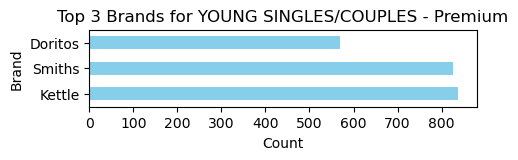

========== YOUNG SINGLES/COUPLES - Budget ==========
Smiths     1245
Kettle     1211
Doritos     899
Name: Cleaned_Brand_Names, dtype: int64


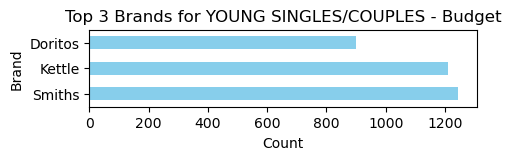

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Kettle      3844
Doritos     2541
Pringles    2315
Name: Cleaned_Brand_Names, dtype: int64


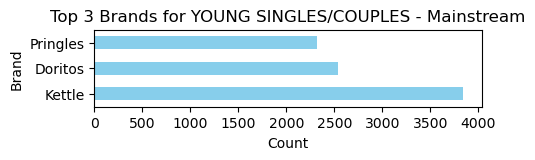

========== MIDAGE SINGLES/COUPLES - Premium ==========
Kettle     1206
Smiths      986
Doritos     837
Name: Cleaned_Brand_Names, dtype: int64


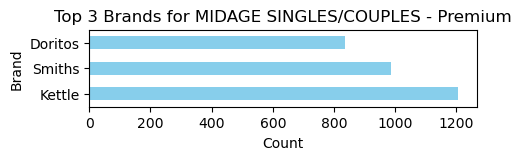

========== MIDAGE SINGLES/COUPLES - Budget ==========
Kettle     713
Smiths     633
Doritos    533
Name: Cleaned_Brand_Names, dtype: int64


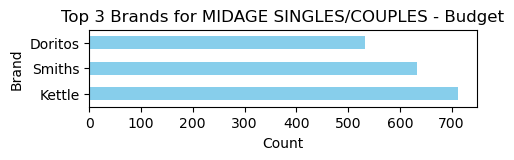

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Kettle     2136
Smiths     1337
Doritos    1291
Name: Cleaned_Brand_Names, dtype: int64


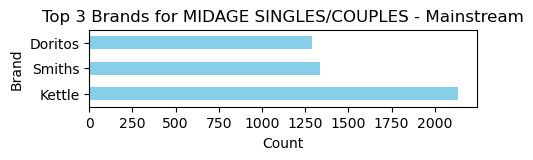

========== NEW FAMILIES - Premium ==========
Kettle      247
Doritos     167
Pringles    165
Name: Cleaned_Brand_Names, dtype: int64


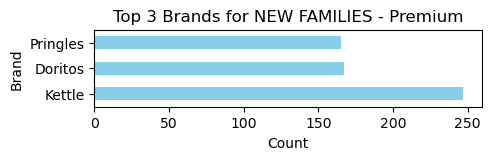

========== NEW FAMILIES - Budget ==========
Kettle     510
Doritos    343
Smiths     341
Name: Cleaned_Brand_Names, dtype: int64


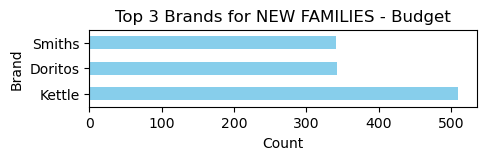

========== NEW FAMILIES - Mainstream ==========
Kettle     414
Doritos    274
Smiths     254
Name: Cleaned_Brand_Names, dtype: int64


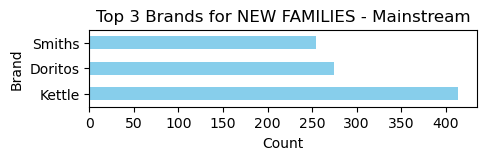

========== OLDER FAMILIES - Premium ==========
Smiths     1515
Kettle     1512
Doritos    1065
Name: Cleaned_Brand_Names, dtype: int64


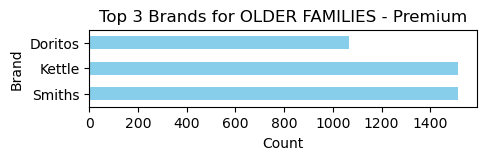

========== OLDER FAMILIES - Budget ==========
Kettle     3320
Smiths     3093
Doritos    2351
Name: Cleaned_Brand_Names, dtype: int64


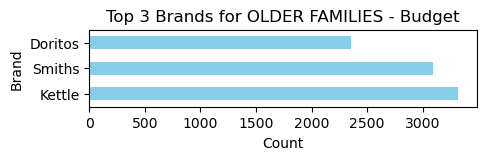

========== OLDER FAMILIES - Mainstream ==========
Kettle     2019
Smiths     1835
Doritos    1449
Name: Cleaned_Brand_Names, dtype: int64


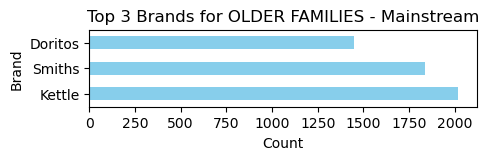

========== OLDER SINGLES/COUPLES - Premium ==========
Kettle     2947
Smiths     2042
Doritos    1958
Name: Cleaned_Brand_Names, dtype: int64


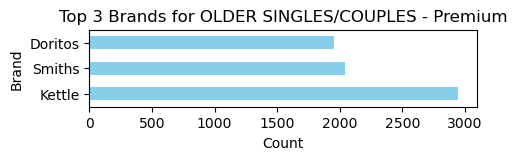

========== OLDER SINGLES/COUPLES - Budget ==========
Kettle     3065
Smiths     2098
Doritos    1954
Name: Cleaned_Brand_Names, dtype: int64


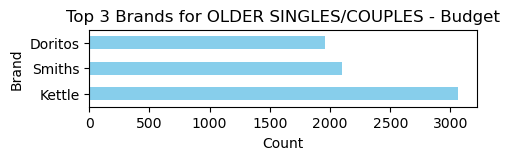

========== OLDER SINGLES/COUPLES - Mainstream ==========
Kettle     2835
Smiths     2180
Doritos    2008
Name: Cleaned_Brand_Names, dtype: int64


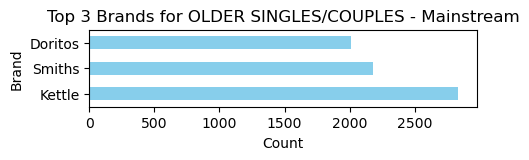

========== RETIREES - Premium ==========
Kettle     2216
Smiths     1458
Doritos    1409
Name: Cleaned_Brand_Names, dtype: int64


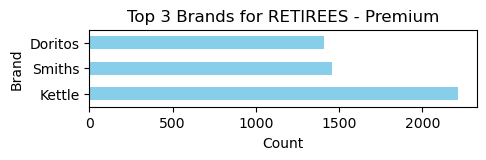

========== RETIREES - Budget ==========
Kettle     2592
Doritos    1742
Smiths     1679
Name: Cleaned_Brand_Names, dtype: int64


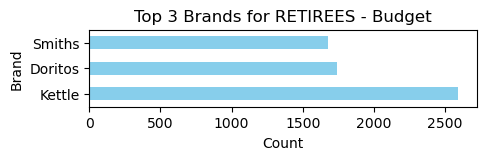

========== RETIREES - Mainstream ==========
Kettle     3386
Smiths     2476
Doritos    2320
Name: Cleaned_Brand_Names, dtype: int64


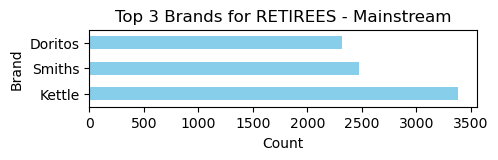

========== YOUNG FAMILIES - Premium ==========
Kettle     1745
Smiths     1442
Doritos    1129
Name: Cleaned_Brand_Names, dtype: int64


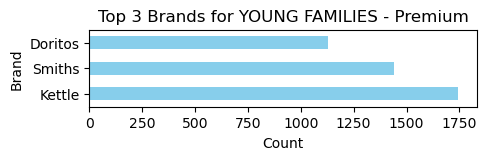

========== YOUNG FAMILIES - Budget ==========
Kettle     2743
Smiths     2459
Doritos    1996
Name: Cleaned_Brand_Names, dtype: int64


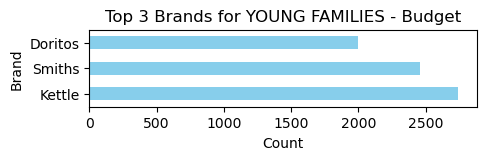

========== YOUNG FAMILIES - Mainstream ==========
Kettle     1789
Smiths     1772
Doritos    1309
Name: Cleaned_Brand_Names, dtype: int64


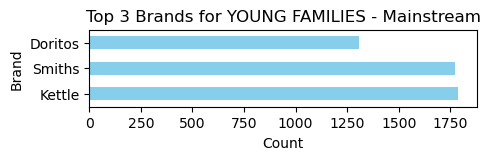

In [50]:
for stage in merged_data["LIFESTAGE"].unique():
    for prem in merged_data["PREMIUM_CUSTOMER"].unique():
        print('==========', stage, '-', prem, '==========')
        subset = merged_data[(merged_data["LIFESTAGE"] == stage) & (merged_data["PREMIUM_CUSTOMER"] == prem)]
        summary = subset["Cleaned_Brand_Names"].value_counts().head(3)
        print(summary)
        
        # Create a horizontal bar chart
        plt.figure(figsize=(5, 1))
        summary.plot(kind='barh', color='skyblue')
        
        # Customize the plot
        plt.title(f"Top 3 Brands for {stage} - {prem}")
        plt.xlabel("Count")
        plt.ylabel("Brand")
        
        # Show the plot
        plt.show()


Every segment had Kettle as the most purchased brand. Every segment except "YOUNG SINGLES/COUPLES Mainstream" had Smiths as their second most purchased brand. "YOUNG SINGLES/COUPLES Mainstream" had Doritos as their second most purchased brand.

In [51]:
temp = merged_data.reset_index().rename(columns = {"index": "transaction"})
temp["Segment"] = temp["LIFESTAGE"] + ' - ' + temp['PREMIUM_CUSTOMER']
segment_brand_encode = pd.concat([pd.get_dummies(temp["Segment"]), pd.get_dummies(temp["Cleaned_Brand_Names"])], axis=1)

frequent_sets = apriori(segment_brand_encode, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_sets, metric="lift", min_threshold=1)

set_temp = temp["Segment"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]
     

c:\Users\Sakawat Siyam\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(OLDER FAMILIES - Budget),(Smiths),0.087451,0.120162,0.011679,0.133549,1.111409,0.001171,1.015451,0.109848
2,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069504,0.155901,0.011573,0.166513,1.068064,0.000738,1.012731,0.068487
4,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.067038,0.155901,0.011128,0.165991,1.064716,0.000676,1.012097,0.065150
6,(RETIREES - Mainstream),(Kettle),0.081055,0.155901,0.012785,0.157738,1.011779,0.000149,1.002180,0.012669
8,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.078744,0.155901,0.014515,0.184329,1.182344,0.002239,1.034852,0.167405


========== YOUNG SINGLES/COUPLES - Premium ==========
134.0     537
150.0     961
175.0    1587
Name: Pack_Size, dtype: int64


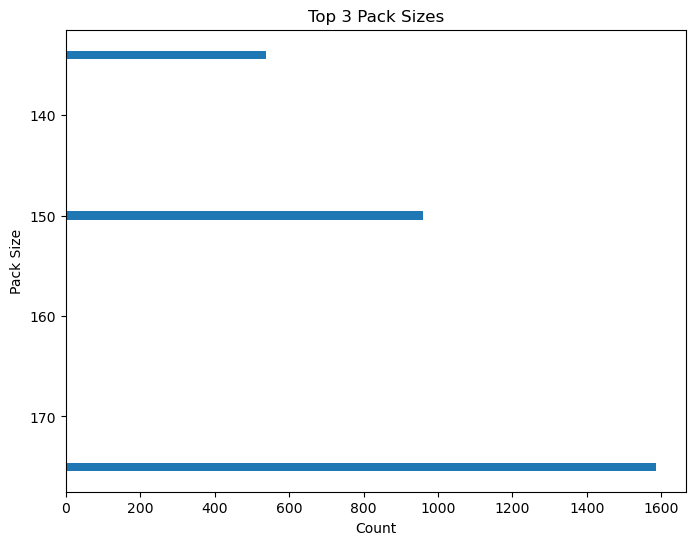

========== MIDAGE SINGLES/COUPLES - Budget ==========
134.0     449
150.0     821
175.0    1256
Name: Pack_Size, dtype: int64


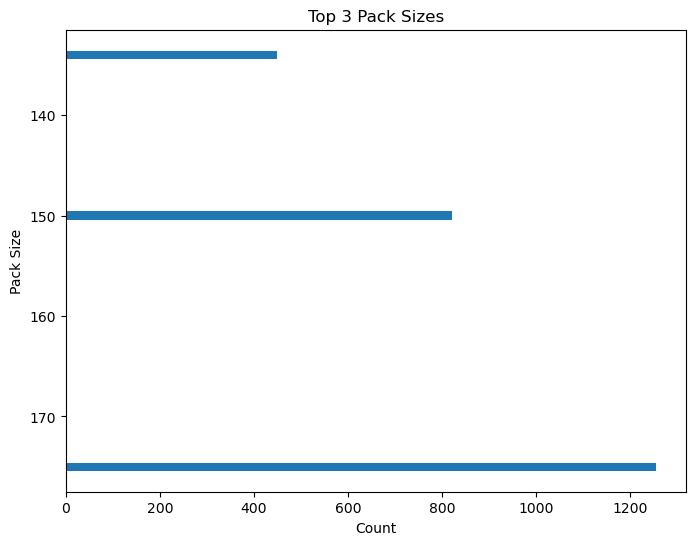

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
134.0    1159
150.0    1819
175.0    2912
Name: Pack_Size, dtype: int64


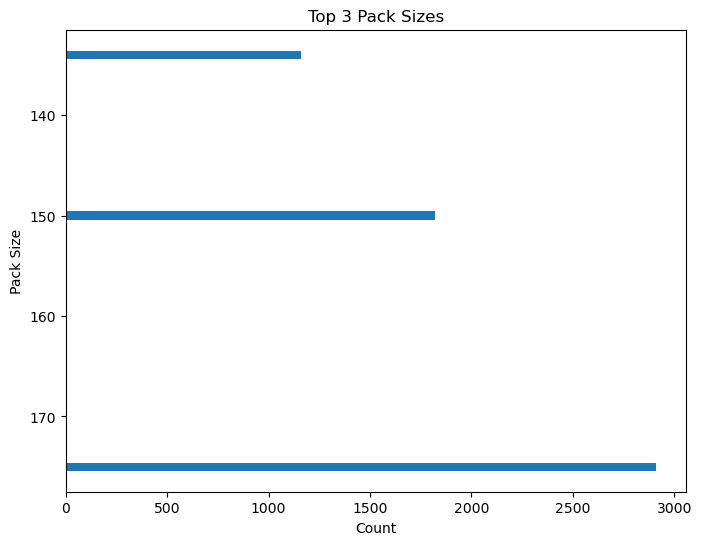

========== MIDAGE SINGLES/COUPLES - Premium ==========
134.0     781
150.0    1285
175.0    2034
Name: Pack_Size, dtype: int64


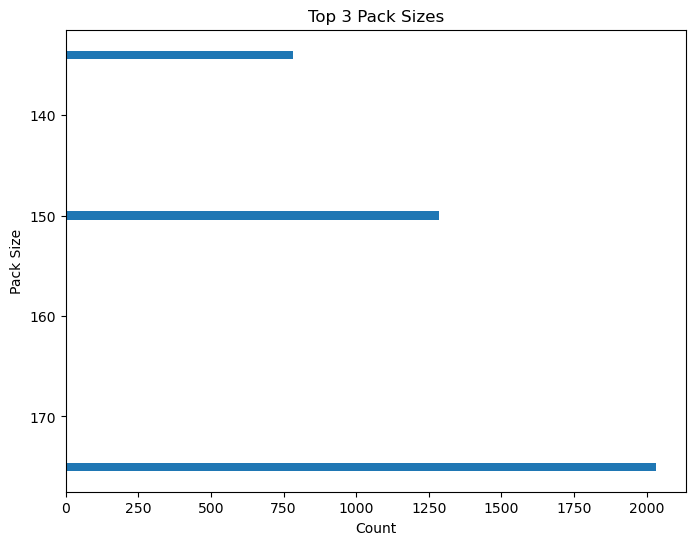

========== NEW FAMILIES - Budget ==========
134.0    309
150.0    448
175.0    763
Name: Pack_Size, dtype: int64


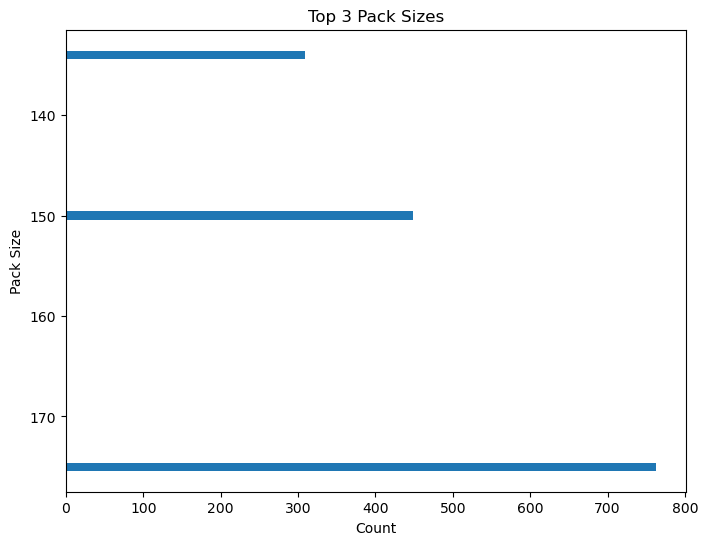

========== NEW FAMILIES - Mainstream ==========
134.0    224
150.0    384
175.0    579
Name: Pack_Size, dtype: int64


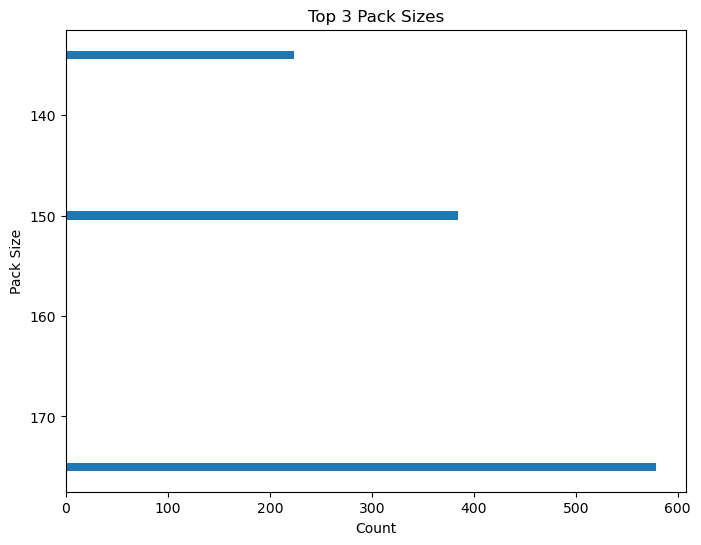

========== NEW FAMILIES - Premium ==========
134.0    165
150.0    245
175.0    371
Name: Pack_Size, dtype: int64


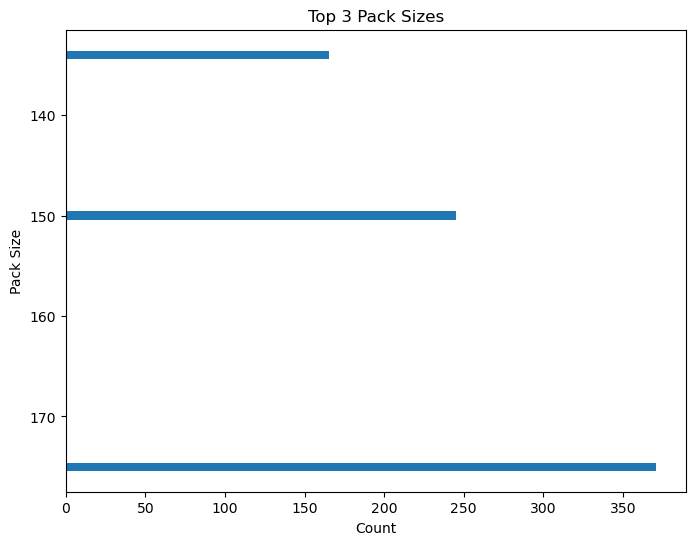

========== OLDER FAMILIES - Budget ==========
134.0    1996
150.0    3708
175.0    5662
Name: Pack_Size, dtype: int64


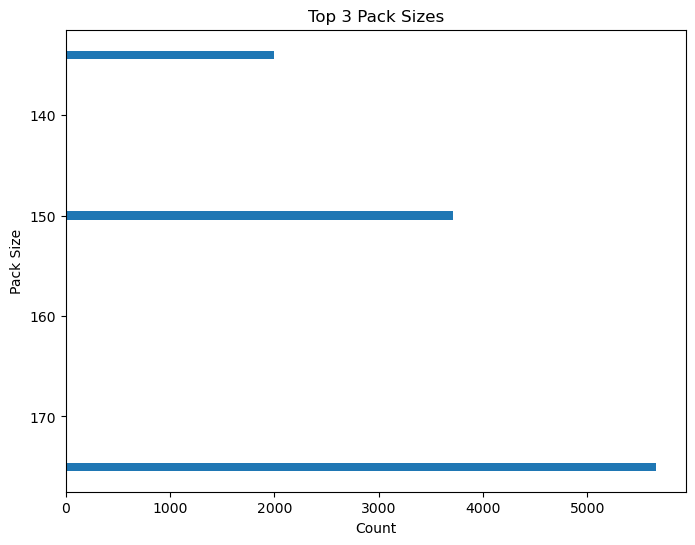

========== OLDER FAMILIES - Mainstream ==========
134.0    1234
150.0    2261
175.0    3489
Name: Pack_Size, dtype: int64


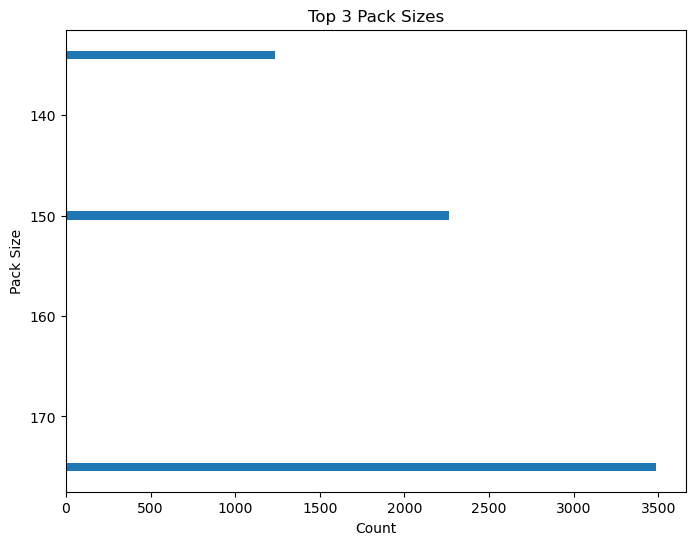

========== OLDER FAMILIES - Premium ==========
134.0    1014
150.0    1750
175.0    2747
Name: Pack_Size, dtype: int64


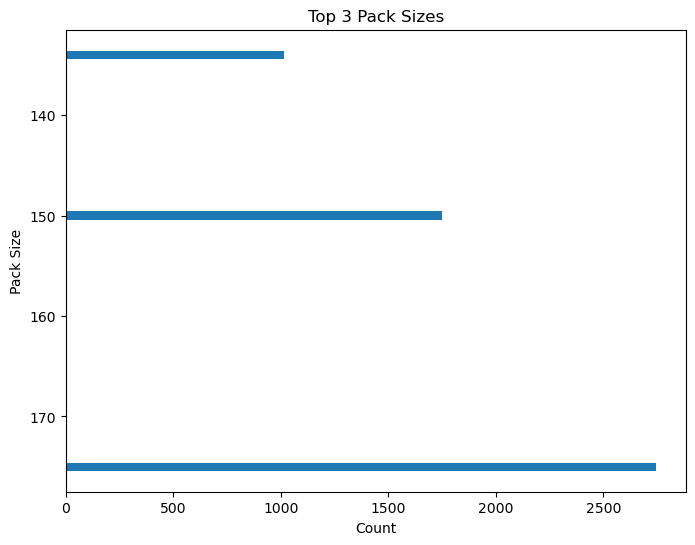

========== OLDER SINGLES/COUPLES - Budget ==========
134.0    1843
150.0    2899
175.0    4535
Name: Pack_Size, dtype: int64


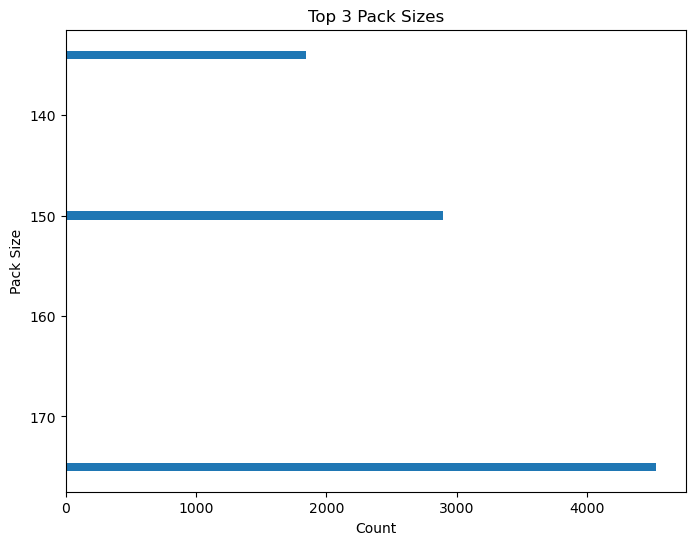

========== OLDER SINGLES/COUPLES - Mainstream ==========
134.0    1720
150.0    2875
175.0    4422
Name: Pack_Size, dtype: int64


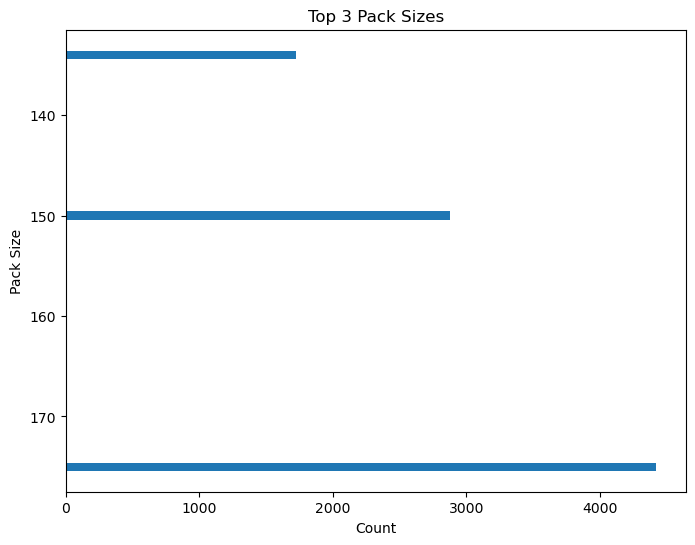

========== OLDER SINGLES/COUPLES - Premium ==========
134.0    1744
150.0    2854
175.0    4382
Name: Pack_Size, dtype: int64


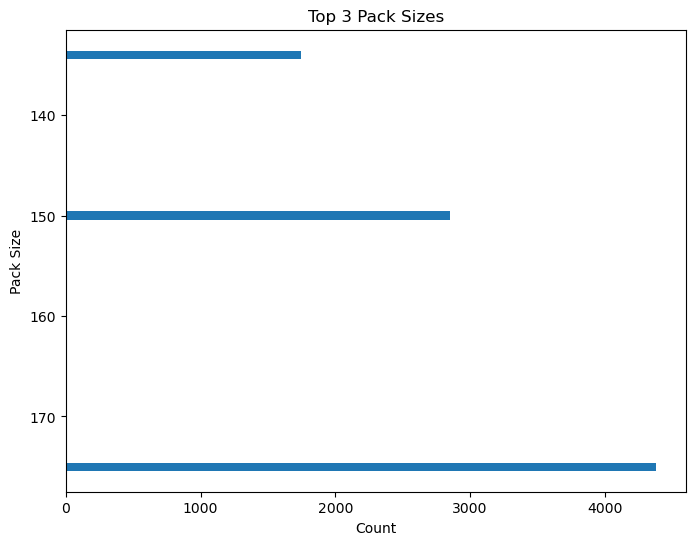

========== RETIREES - Budget ==========
134.0    1517
150.0    2381
175.0    3768
Name: Pack_Size, dtype: int64


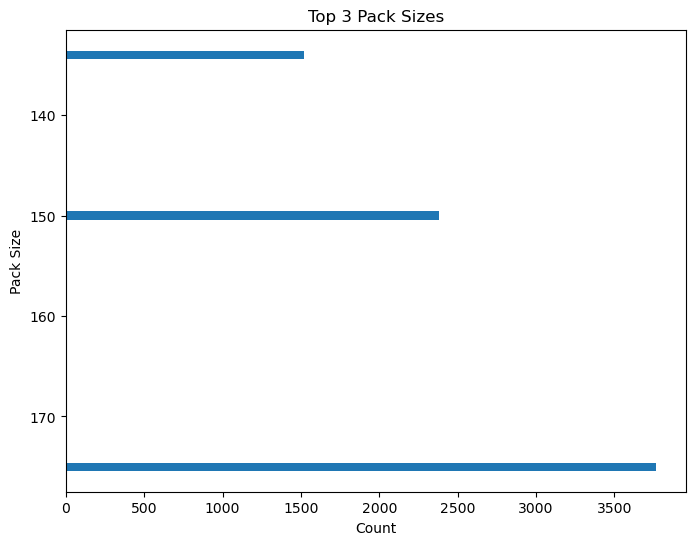

========== RETIREES - Mainstream ==========
134.0    2103
150.0    3415
175.0    5187
Name: Pack_Size, dtype: int64


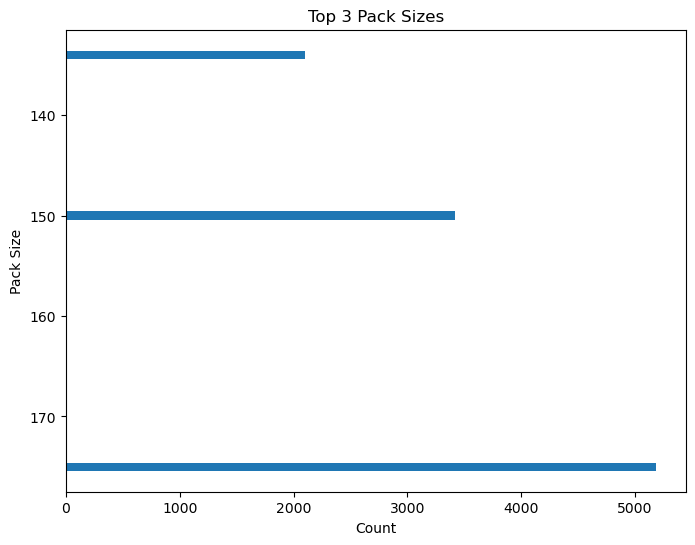

========== RETIREES - Premium ==========
134.0    1331
150.0    2015
175.0    3232
Name: Pack_Size, dtype: int64


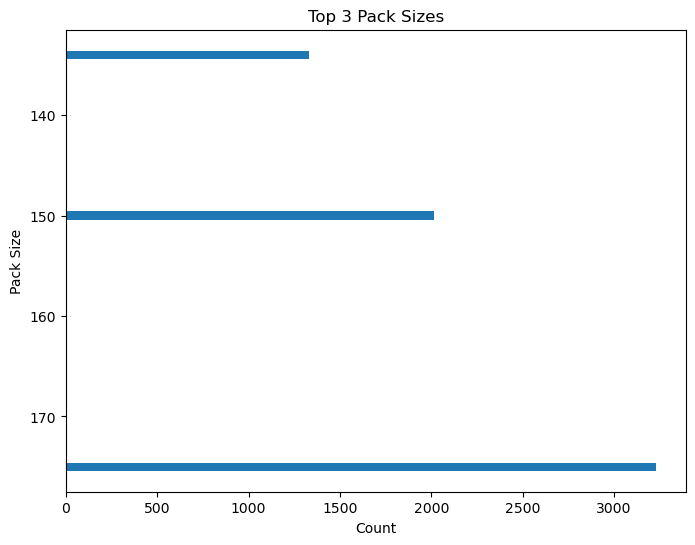

========== YOUNG FAMILIES - Budget ==========
134.0    1674
150.0    2981
175.0    4800
Name: Pack_Size, dtype: int64


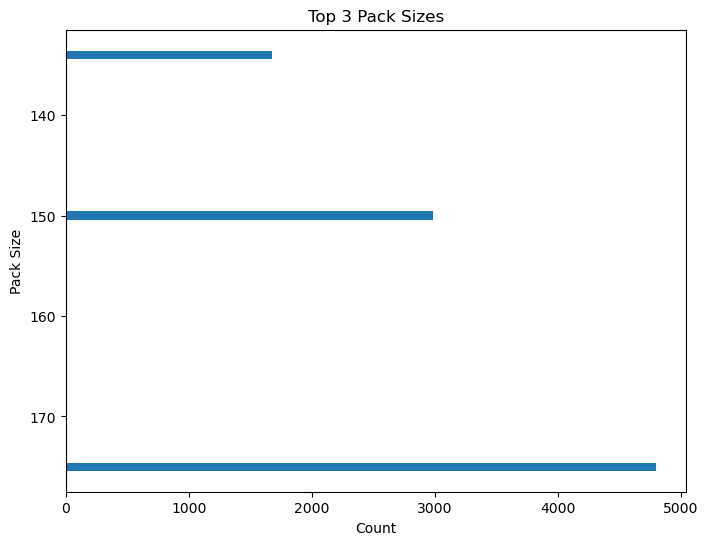

========== YOUNG FAMILIES - Mainstream ==========
134.0    1148
150.0    2101
175.0    3087
Name: Pack_Size, dtype: int64


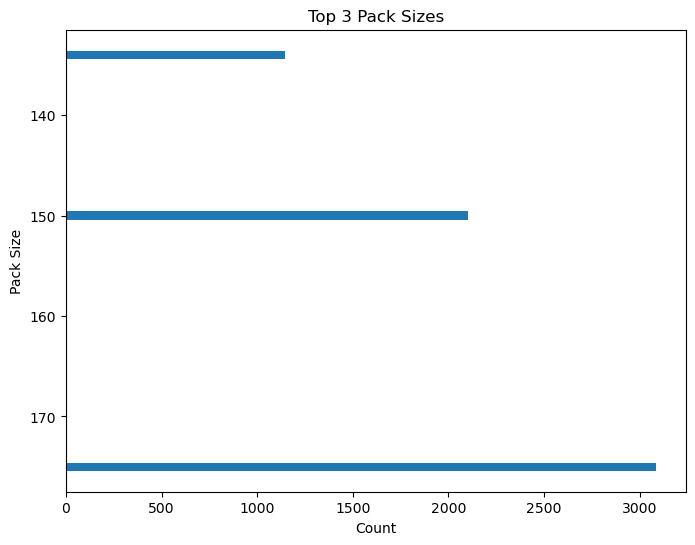

========== YOUNG FAMILIES - Premium ==========
134.0    1007
150.0    1832
175.0    2926
Name: Pack_Size, dtype: int64


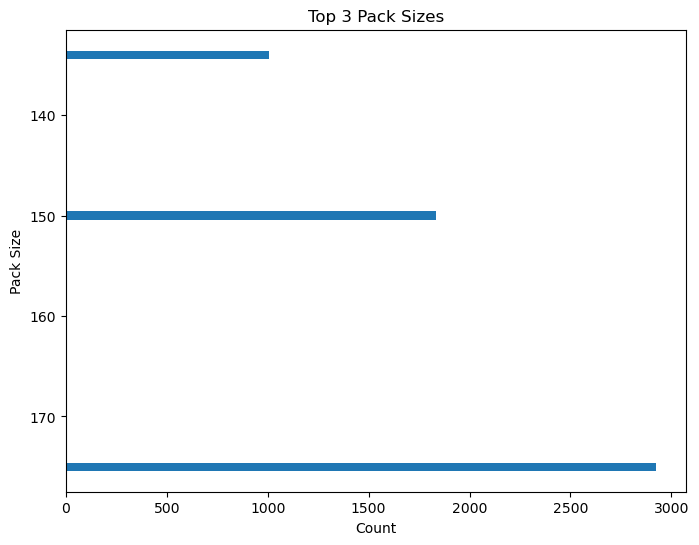

========== YOUNG SINGLES/COUPLES - Budget ==========
134.0     832
150.0    1439
175.0    2262
Name: Pack_Size, dtype: int64


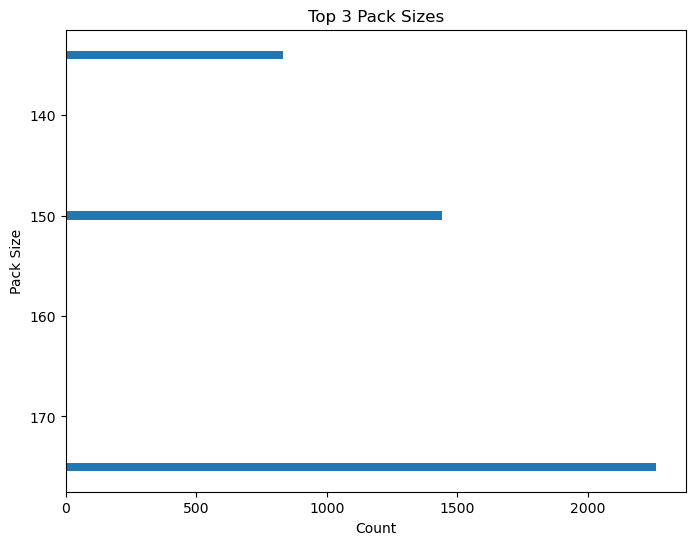

========== YOUNG SINGLES/COUPLES - Mainstream ==========
134.0    2315
150.0    3159
175.0    4928
Name: Pack_Size, dtype: int64


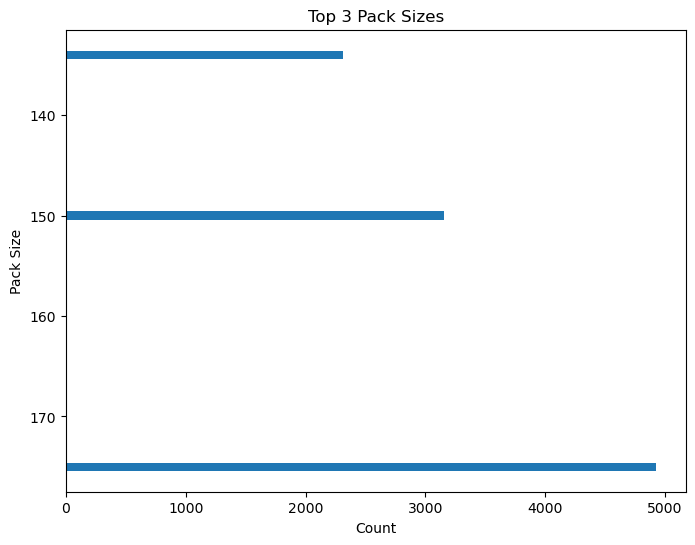

In [52]:
merged_pack = pd.concat([merged_data, pack_sizes.rename("Pack_Size")], axis=1)

# Create a list of unique combinations of "LIFESTAGE" and "PREMIUM_CUSTOMER"
unique_combinations = merged_data[["LIFESTAGE", "PREMIUM_CUSTOMER"]].drop_duplicates()

for index, row in unique_combinations.iterrows():
    stage = row["LIFESTAGE"]
    prem = row["PREMIUM_CUSTOMER"]

    # Filter the data for the current combination of 'LIFESTAGE' and 'PREMIUM_CUSTOMER'
    filtered_data = merged_pack[(merged_pack["LIFESTAGE"] == stage) & (merged_pack["PREMIUM_CUSTOMER"] == prem)]

    # Check if there's enough data to plot
    if len(filtered_data) >= 3:
        print('==========', stage, '-', prem, '==========')
        
        # Calculate the top 3 pack sizes
        top_pack_sizes = filtered_data["Pack_Size"].value_counts().head(3).sort_index()
        print(top_pack_sizes)

        # Create a horizontal bar plot
        plt.figure(figsize=(8, 6))
        plt.barh(top_pack_sizes.index, top_pack_sizes.values)
        plt.xlabel('Count')
        plt.ylabel('Pack Size')
        plt.title('Top 3 Pack Sizes')
        plt.gca().invert_yaxis()  # Invert the y-axis for better readability
        plt.show()
    else:
        print('Not enough data for', stage, '-', prem)



In [53]:
(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Mainstream          9.804309
                        Budget              9.639572
                        Premium             9.578091
YOUNG FAMILIES          Budget              9.238486
                        Premium             9.209207
                        Mainstream          9.180352
OLDER SINGLES/COUPLES   Premium             7.154947
                        Budget              7.145466
                        Mainstream          7.098783
MIDAGE SINGLES/COUPLES  Mainstream          6.796108
RETIREES                Budget              6.458015
                        Premium             6.426653
MIDAGE SINGLES/COUPLES  Premium             6.386672
                        Budget              6.313830
RETIREES                Mainstream          6.253743
NEW FAMILIES            Mainstream          5.087161
                        Premium             5.028912
                        Budget              5.009892
YOUNG

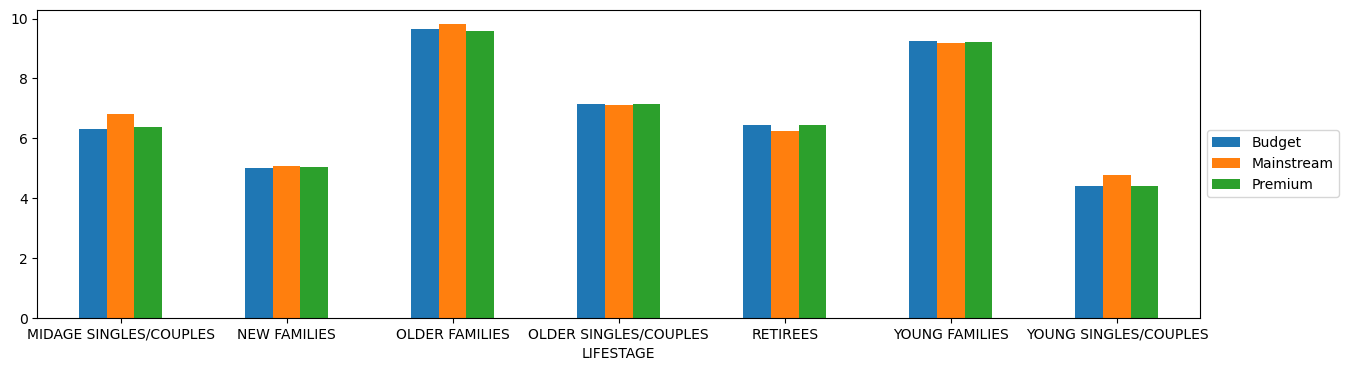

In [54]:
# Calculate the average purchase quantity per segment and unstack the result
average_purchase_qty = (temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).unstack()

# Create a bar plot with the specified figure size and no rotation for x-axis labels
average_purchase_qty.plot.bar(figsize=(15, 4), rot=0)

# Place the legend to the right of the plot
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

# Save the plot as an image file with a tight bounding box
plt.savefig("Average_purchase_quantity_per_segment.png", bbox_inches="tight")


In [55]:
#average chips price per transaction by segments
temp['Unit_Price'] = temp['TOT_SALES']/temp['PROD_QTY']
temp.groupby(['Segment']).mean()['Unit_Price'].sort_values(ascending=False)

C:\Users\Sakawat Siyam\AppData\Local\Temp\ipykernel_18544\431786465.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp.groupby(['Segment']).mean()['Unit_Price'].sort_values(ascending=False)


Segment
YOUNG SINGLES/COUPLES - Mainstream     4.071485
MIDAGE SINGLES/COUPLES - Mainstream    4.000101
RETIREES - Budget                      3.924883
RETIREES - Premium                     3.921323
NEW FAMILIES - Budget                  3.919251
NEW FAMILIES - Mainstream              3.916581
OLDER SINGLES/COUPLES - Premium        3.887220
OLDER SINGLES/COUPLES - Budget         3.877022
NEW FAMILIES - Premium                 3.871743
RETIREES - Mainstream                  3.833343
OLDER SINGLES/COUPLES - Mainstream     3.803800
YOUNG FAMILIES - Budget                3.753659
MIDAGE SINGLES/COUPLES - Premium       3.752915
YOUNG FAMILIES - Premium               3.752402
OLDER FAMILIES - Budget                3.733344
MIDAGE SINGLES/COUPLES - Budget        3.728496
OLDER FAMILIES - Mainstream            3.727383
YOUNG FAMILIES - Mainstream            3.707097
OLDER FAMILIES - Premium               3.704625
YOUNG SINGLES/COUPLES - Premium        3.645518
YOUNG SINGLES/COUPLES - Budget  

C:\Users\Sakawat Siyam\AppData\Local\Temp\ipykernel_18544\1713013024.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).mean()["Unit_Price"].unstack().plot.bar(figsize=(15,4), rot=0)


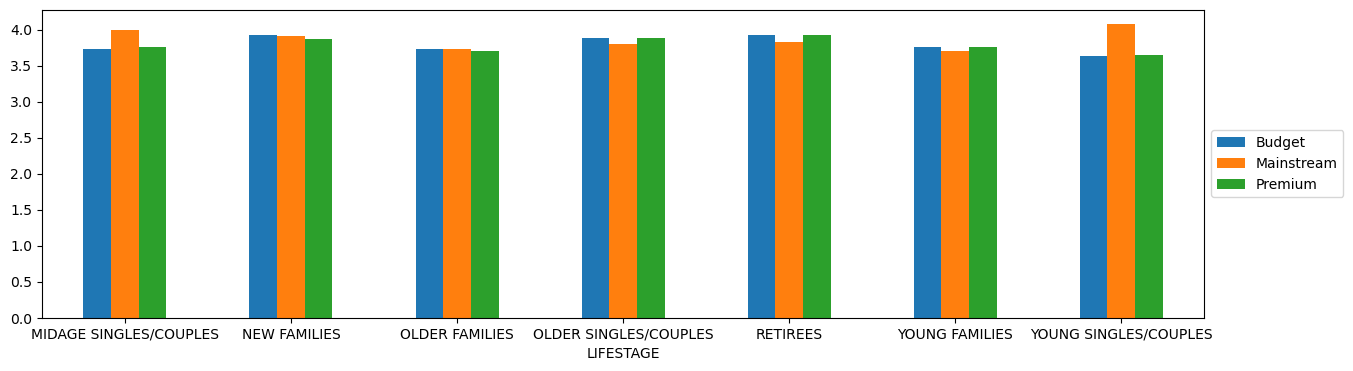

In [56]:
temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).mean()["Unit_Price"].unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.show()

In [57]:
z = temp.groupby(["Segment", "Cleaned_Brand_Names"]).sum()["TOT_SALES"].sort_values(ascending=False).reset_index()
z[z["Segment"] == "YOUNG SINGLES/COUPLES - Mainstream"]

C:\Users\Sakawat Siyam\AppData\Local\Temp\ipykernel_18544\1862091413.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  z = temp.groupby(["Segment", "Cleaned_Brand_Names"]).sum()["TOT_SALES"].sort_values(ascending=False).reset_index()


,Segment,Cleaned_Brand_Names,TOT_SALES
0,YOUNG SINGLES/COUPLES - Mainstream,Kettle,35423.6
8,YOUNG SINGLES/COUPLES - Mainstream,Doritos,21705.9
23,YOUNG SINGLES/COUPLES - Mainstream,Pringles,16006.2
24,YOUNG SINGLES/COUPLES - Mainstream,Smiths,15265.7
55,YOUNG SINGLES/COUPLES - Mainstream,Infuzions,8749.4
59,YOUNG SINGLES/COUPLES - Mainstream,Old,8180.4
65,YOUNG SINGLES/COUPLES - Mainstream,Twisties,7539.8
73,YOUNG SINGLES/COUPLES - Mainstream,Tostitos,7238.0
74,YOUNG SINGLES/COUPLES - Mainstream,Thins,7217.1
92,YOUNG SINGLES/COUPLES - Mainstream,Cobs,6144.6


## Trends and Insights

The top three segments contributing the most to total sales are as follows:

 ♂. Older Families (Budget) with total sales of $156,864.

 ♂. Young Singles/Couples (Mainstream) with total sales of $147,582.

 ♂. Retirees (Mainstream) with total sales of $145,169.

1. Young Singles/Couples (Mainstream) has the highest population, followed by Retirees (Mainstream), which accounts for their substantial total sales figures.

2. Surprisingly, Older Families, despite not having the highest population, exhibit the highest frequency of purchase. This frequent purchasing behavior contributes significantly to their overall high total sales.

3. When it comes to the quantity of chips bought per purchase, Older Families, followed by Young Families, lead the pack with the highest averages.

4. Intriguingly, within the Mainstream category, "Young and Midage Singles/Couples" exhibit the highest spending on chips per purchase. This difference is statistically significant when compared to the non-Mainstream "Young and Midage Singles/Couples."

5. Across all segments, the most purchased chips brand is Kettle, dominating the market.

6. However, the second most purchased brand varies, with "Young and Midage Singles/Couples" showing a preference for Doritos, setting them apart from other segments, which favor Smiths.

7. The most frequently purchased chip sizes across all segments are 175g, followed closely by 150g.